# Ch.5　MMD と HSIC

In [1]:
# 第 5 章のプログラムは，事前に下記が実行されていることを仮定する。
import numpy as np
from scipy.stats import kde
import itertools
import math
import matplotlib.pyplot as plt
from matplotlib import style
style.use("seaborn-ticks")

## 5.1　RKHS における確率変数

## 5.2　MMD と 2 標本問題

### 例71

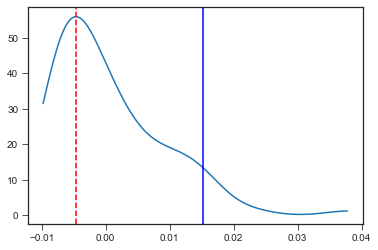

In [2]:
sigma = 1


def k(x, y):
    return np.exp(-(x - y)**2 / sigma**2)


# データの生成
n = 100
xx = np.random.randn(n)
yy = np.random.randn(n)        # 分布が等しいとき
# yy = 2 * np.random.randn(n)  # 分布が等しくないとき
x = xx
y = yy

# 帰無分布の計算
T = []
for h in range(100):
    index1 = np.random.choice(n, size=int(n/2), replace=False)
    index2 = [x for x in range(n) if x not in index1]
    x = list(xx[index2]) + list(yy[index1])
    y = list(xx[index1]) + list(yy[index2])
    S = 0
    for i in range(n):
        for j in range(n):
            if i != j:
                S = S + k(x[i], x[j]) + k(y[i], y[j]) \
                    - k(x[i], y[j]) - k(x[j], y[i])
    T.append(S / n / (n - 1))
v = np.quantile(T, 0.95)

# 統計量の計算
S = 0
for i in range(n):
    for j in range(n):
        if i != j:
            S = S + k(x[i], x[j]) + k(y[i], y[j]) \
                - k(x[i], y[j]) - k(x[j], y[i])
u = S / n / (n - 1)

# グラフの図示
x = np.linspace(min(min(T), u, v), max(max(T), u, v), 200)
density = kde.gaussian_kde(T)
plt.plot(x, density(x))
plt.axvline(x=u, c="r", linestyle="--")
plt.axvline(x=v, c="b")

### 例73

<ipython-input-3-bc15dbbf965b>:24: ComplexWarning: Casting complex values to real discards the imaginary part
  z.append(np.longdouble(1 / n * (np.sum(lam[0:r] * (


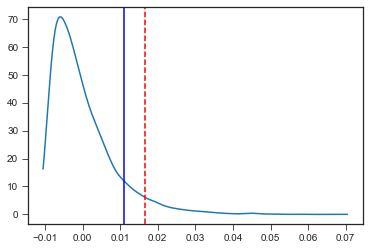

In [3]:
sigma = 1


def k(x, y):
    return np.exp(-(x - y)**2 / sigma**2)


# データの生成
n = 100
x = np.random.randn(n)
y = np.random.randn(n)        # 分布が等しいとき
# y = 2 * np.random.randn(n)  # 分布が等しくないとき

# 帰無分布の計算
K = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        K[i, j] = k(x[i], x[j]) + k(y[i], y[j]) - k(x[i], y[j]) - k(x[j], y[i])
lam, vec = np.linalg.eig(K)
lam = lam / n
r = 20
z = []
for h in range(10000):
    z.append(np.longdouble(1 / n * (np.sum(lam[0:r] * (
        np.random.chisquare(df=1, size=r) - 1)))))
v = np.quantile(z, 0.95)

# 統計量の計算
S = 0
for i in range(n - 1):
    for j in range(i + 1, n):
        S = S + k(x[i], x[j]) + k(y[i], y[j]) - k(x[i], y[j]) - k(x[j], y[i])
u = np.longdouble(S / n / (n - 1))
x = np.linspace(min(min(z), u, v), max(max(z), u, v), 200)

# グラフの図示
density = kde.gaussian_kde(z)
plt.plot(x, density(x))
plt.axvline(x=v, c="r", linestyle="--")
plt.axvline(x=u, c="b")

## 5.3　HSIC と独立性検定

In [4]:
def HSIC_1(x, y, k_x, k_y):
    n = len(x)
    S = 0
    for i in range(n):
        for j in range(n):
            S = S + k_x(x[i], x[j]) * k_y(y[i], y[j])
    T = 0
    for i in range(n):
        T_1 = 0
        for j in range(n):
            T_1 = T_1 + k_x(x[i], x[j])
        T_2 = 0
        for l in range(n):
            T_2 = T_2 + k_y(y[i], y[l])
        T = T + T_1 * T_2
    U = 0
    for i in range(n):
        for j in range(n):
            U = U + k_x(x[i], x[j])
    V = 0
    for i in range(n):
        for j in range(n):
            V = V + k_y(y[i], y[j])
    return S / n**2 - 2 * T / n**3 + U * V / n**4

In [5]:
def HSIC_1(x, y, k_x, k_y):
    n = len(x)
    K_x = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K_x[i, j] = k_x(x[i], x[j])
    K_y = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K_y[i, j] = k_y(y[i], y[j])
    E = np.ones((n, n))
    H = np.identity(n) - E / n
    return np.sum(np.diag(np.diag(K_x.dot(H).dot(K_y).dot(H)))) / n**2

### 例76

In [6]:
def k_x(x, y):
    return np.exp(-np.linalg.norm(x - y)**2 / 2)


k_y = k_x
k_z = k_x
n = 100
for a in [0, 0.1, 0.2, 0.4, 0.6, 0.8]:  # a は相関係数
    x = np.random.randn(n)
    z = np.random.randn(n)
    y = a * x + np.sqrt(1 - a**2) * z
    print(HSIC_1(x, y, k_x, k_y))

0.0009736437528577454
0.001400951577772509
0.001833994198411774
0.008413397368394523
0.02378942294661505
0.039967622061365525


In [7]:
def HSIC_2(x, y, z, k_x, k_y, k_z):
    n = len(x)
    S = 0
    for i in range(n):
        for j in range(n):
            S = S + k_x(x[i], x[j]) * k_y(y[i], y[j]) * k_z(z[i], z[j])
    T = 0
    for i in range(n):
        T_1 = 0
        for j in range(n):
            T_1 = T_1 + k_x(x[i], x[j])
        T_2 = 0
        for l in range(n):
            T_2 = T_2 + k_y(y[i], y[l]) * k_z(z[i], z[j])
        T = T + T_1 * T_2
    U = 0
    for i in range(n):
        for j in range(n):
            U = U + k_x(x[i], x[j])
    V = 0
    for i in range(n):
        for j in range(n):
            V = V + k_y(y[i], y[j]) * k_z(z[i], z[j])
    return S / n**2 - 2 * T / n**3 + U * V / n**4

### 例77

In [8]:
def cc(x, y):
    return np.sum(np.dot(x.T, y)) / len(x)


def f(u, v):
    return u - cc(u, v) / cc(v, v) * v

In [9]:
# データ生成
n = 30
x = np.random.randn(n)**2 - np.random.randn(n)**2
y = 2 * x + np.random.randn(n)**2 - np.random.randn(n)**2
z = x + y + np.random.randn(n)**2 - np.random.randn(n)**2
x = x - np.mean(x)
y = y - np.mean(y)
z = z - np.mean(z)

# 上流を推定
x_y = f(x, y)
y_z = f(y, z)
z_x = f(z, x)
x_z = f(x, z)
z_y = f(z, y)
y_x = f(y, x)
v1 = HSIC_2(x, y_x, z_x, k_x, k_y, k_z)
v2 = HSIC_2(y, z_y, x_y, k_y, k_z, k_x)
v3 = HSIC_2(z, x_z, y_z, k_z, k_x, k_y)

if v1 < v2:
    if v1 < v3:
        top = 1
    else:
        top = 3
else:
    if v2 < v3:
        top = 2
    else:
        top = 3

# 下流を推定
x_yz = f(x_y, z_y)
y_zx = f(y_z, x_z)
z_xy = f(z_x, y_x)

if top == 1:
    v1 = HSIC_1(y_x, z_xy, k_y, k_z)
    v2 = HSIC_1(z_x, y_zx, k_z, k_y)
    if v1 < v2:
        middle = 2
        bottom = 3
    else:
        middle = 3
        bottom = 2
if top == 2:
    v1 = HSIC_1(z_y, x_yz, k_y, k_z)
    v2 = HSIC_1(x_y, z_xy, k_z, k_y)
    if v1 < v2:
        middle = 3
        bottom = 1
    else:
        middle = 1
        bottom = 3

if top == 3:
    v1 = HSIC_1(z_y, x_yz, k_z, k_x)
    v2 = HSIC_1(x_y, z_xy, k_x, k_z)
    if v1 < v2:
        middle = 1
        bottom = 2
    else:
        middle = 2
        bottom = 1

# 結果を出力
print("top =", top)
print("middle =", middle)
print("bottom =", bottom)

top = 3
middle = 2
bottom = 1


### 例78

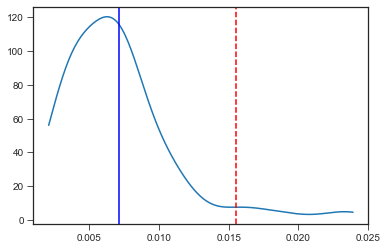

In [10]:
# x を並べ替えて，HSIC の分布をヒストグラムで表示
# データ生成
x = np.random.randn(n)
y = np.random.randn(n)
u = HSIC_1(x, y, k_x, k_y)

# x を並べ替えて，帰無分布を構成
m = 100
w = []
for i in range(m):
    x = x[np.random.choice(n, n, replace=False)]
    w.append(HSIC_1(x, y, k_x, k_y))

# 棄却域を設定
v = np.quantile(w, 0.95)
x = np.linspace(min(min(w), u, v), max(max(w), u, v), 200)

# グラフで表示
density = kde.gaussian_kde(w)
plt.plot(x, density(x))
plt.axvline(x=v, c="r", linestyle="--")
plt.axvline(x=u, c="b")

In [11]:
def h(i, j, q, r, x, y, k_x, k_y):
    M = list(itertools.combinations([i, j, q, r], 4))
    m = len(M)
    S = 0
    for j in range(m):
        t = M[j][0]
        u = M[j][1]
        v = M[j][2]
        w = M[j][3]
        S = S + k_x(x[t], x[u]) * k_y(y[t], y[u]) \
            + k_x(x[t], x[u]) * k_y(y[v], y[w]) \
            - 2 * k_x(x[t], x[u]) * k_y(y[t], y[v])
    return S / m


def HSIC_U(x, y, k_x, k_y):
    M = list(itertools.combinations(range(n), 4))
    m = len(M)
    S = 0
    for j in range(m):
        S = S + h(M[j][0], M[j][1], M[j][2], M[j][3], x, y, k_x, k_y)
    return S / math.comb(n, 4)

### 例79

[9.54005214e-03 8.32153853e-03 7.22253040e-03 5.01302709e-03
 3.60365843e-03 2.86975859e-03 2.19531341e-03 1.86905699e-03
 1.49967690e-03 1.38193318e-03 1.05761952e-03 8.86093045e-04
 7.79747520e-04 5.50078162e-04 4.85679060e-04 4.06283642e-04
 3.45310492e-04 2.89447051e-04 2.36675284e-04 1.73316786e-04
 1.50158502e-04 1.59948545e-04 1.16597455e-04 9.38184193e-05
 8.14542331e-05 6.71905705e-05 5.99647133e-05 4.91633756e-05
 3.19674401e-05 2.71114964e-05 2.27983986e-05 1.80721704e-05
 1.70597432e-05 1.57247192e-05 1.17730466e-05 9.83787642e-06
 8.23853251e-06 7.02348750e-06 6.32228187e-06 3.95289415e-06
 3.66533211e-06 3.16543786e-06 2.49308187e-06 2.01540174e-06
 1.73893492e-06 1.58800600e-06 1.19003169e-06 9.75829618e-07
 8.51422766e-07 6.12329544e-07 5.12249857e-07 4.27248441e-07
 3.72914372e-07 3.44682942e-07 2.61529427e-07 2.18284643e-07
 1.65391794e-07 1.42431037e-07 1.33971130e-07 9.07883661e-08
 8.52079474e-08 6.68796794e-08 5.35060377e-08 4.05106423e-08
 3.14740423e-08 3.046826

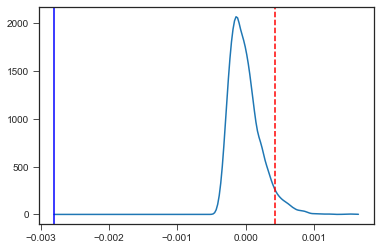

In [12]:
sigma = 1
def k(x, y):
    return np.exp(-(x-y)**2 / sigma**2)
k_x = k; k_y = k
# データの生成
n = 100; x = np.random.randn(n)
a = 0         # 独立のとき
# a = 0.2     # 相関係数 0.2
y = a * x + np.sqrt(1 - a**2) * np.random.randn(n)
# y = np.random.randn(n)*2  # 分布が等しくないとき
# 帰無分布の計算
K_x = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        K_x[i, j] = k_x(x[i], x[j])
K_y = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        K_y[i, j] = k_y(y[i], y[j])
F = np.zeros(n)
for i in range(n):
    F[i] = np.sum(K_x[i, :]) / n
G = np.zeros((n))
for i in range(n):
    G[i] = np.sum(K_y[i, :]) / n
H = np.sum(F) / n
I = np.sum(G) / n
K = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        K[i, j] = (K_x[i, j] - F[i] - F[j] + H) * (K_y[i, j] - G[i] - G[j] + I) / 6
r = 20
lam, vec = np.linalg.eig(K)
lam = lam / n
print(lam)
z = []
for s in range(10000):
    z.append(1 / n * (np.sum(lam[0:r] * (np.random.chisquare(df=1, size=r) - 1))))
v = np.quantile(z, 0.95)
# 統計量の計算
u = HSIC_U(x, y, k_x, k_y)
# グラフの図示
x = np.linspace(min(min(z), u, v), max(max(z), u, v), 200)
density = kde.gaussian_kde(z)
plt.plot(x, density(x))
plt.axvline(x=v, c="r", linestyle="--")
plt.axvline(x=u, c="b")

## 5.4　特性カーネルと普遍カーネル

## 5.5　経験過程入門